# Heart Disease Project

**Column Descriptions**

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
* thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
* target - have disease or not (1=yes, 0=no) (= the predicted attribute)

### Importing Modules and Functions

In [1]:
# Importing Basic Modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Magical Functions

%matplotlib inline

# Importing Various Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LinearRegression

# Importing Required Models for Evaluation
from sklearn.model_selection import train_test_split , cross_val_score , RandomizedSearchCV , GridSearchCV
from sklearn.metrics import accuracy_score , precision_score , recall_score , f1_score , classification_report , confusion_matrix , RocCurveDisplay

### Importing the Heart Disease CSV File

In [2]:
# Importing the CSV File

heart=pd.read_csv("heart-disease.csv")
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


### Details About the Heart Disease CSV File

In [3]:
# About this CSV File

heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
# About this CSV File

heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
# Finding Missing Values

heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Heart Disease Frequency among various Features

#### 1 . Sex Vs Target

In [6]:
# Heart Disease Frequency based on Sex

heart["sex"].value_counts() , heart["target"].value_counts()

(sex
 1    207
 0     96
 Name: count, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

In [7]:
# Sex vs Target

pd.crosstab(heart["sex"],heart["target"])

target,0,1
sex,,
0,24,72
1,114,93


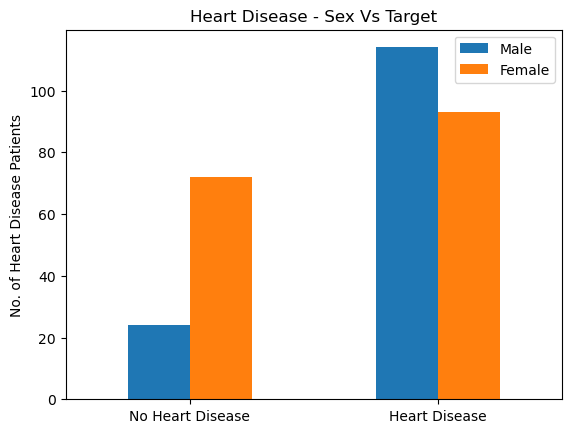

In [8]:
# Plotting Sex vs Target

pd.crosstab(heart["sex"],heart["target"]).plot(kind="bar");
plt.xlabel("");
plt.ylabel("No. of Heart Disease Patients");
plt.title("Heart Disease - Sex Vs Target");
plt.legend(["Male" , "Female"]);
plt.xticks([0,1],["No Heart Disease" , "Heart Disease"],rotation=0);

#### 2 . Age and Heart Rate Vs Target

In [9]:
# Heart Disease Frequency based on Age and Heart Rate

heart["age"].value_counts() , heart["thalach"].value_counts , heart["target"].value_counts()

(age
 58    19
 57    17
 54    16
 59    14
 52    13
 51    12
 62    11
 60    11
 44    11
 56    11
 64    10
 41    10
 63     9
 67     9
 65     8
 43     8
 45     8
 55     8
 42     8
 61     8
 53     8
 46     7
 48     7
 66     7
 50     7
 49     5
 47     5
 70     4
 39     4
 35     4
 68     4
 38     3
 71     3
 40     3
 69     3
 34     2
 37     2
 29     1
 74     1
 76     1
 77     1
 Name: count, dtype: int64,
 <bound method IndexOpsMixin.value_counts of 0      150
 1      187
 2      172
 3      178
 4      163
       ... 
 298    123
 299    132
 300    141
 301    115
 302    174
 Name: thalach, Length: 303, dtype: int64>,
 target
 1    165
 0    138
 Name: count, dtype: int64)

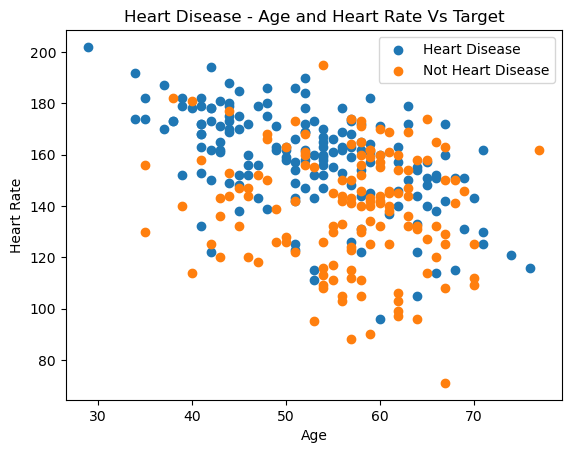

In [10]:
# Plotting Age and Heart Rate vs Target

# Scatter Plot for Heart Disease
plt.scatter(heart.age[heart.target==1] , heart.thalach[heart.target==1])

# Scatter Plot for Not Heart Disease
plt.scatter(heart.age[heart.target==0] , heart.thalach[heart.target==0])

# Plotting Additional Information
plt.xlabel("Age");
plt.ylabel("Heart Rate");
plt.title("Heart Disease - Age and Heart Rate Vs Target");
plt.legend(["Heart Disease" , "Not Heart Disease"]);

#### 3 . Chest Pain Vs Target

In [11]:
# Heart Disease Frequency based on Chest Pain

heart["cp"].value_counts() , heart["target"].value_counts()

(cp
 0    143
 2     87
 1     50
 3     23
 Name: count, dtype: int64,
 target
 1    165
 0    138
 Name: count, dtype: int64)

In [12]:
# Chest Pain vs Target

pd.crosstab(heart["cp"],heart["target"])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


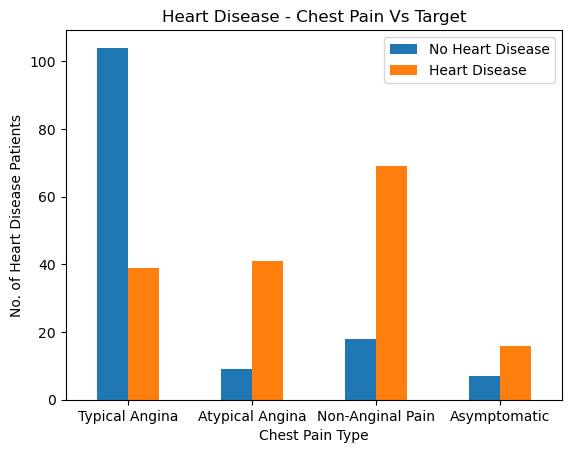

In [13]:
# Plotting Chest Pain vs Target

pd.crosstab(heart["cp"],heart["target"]).plot(kind="bar");
plt.xlabel("Chest Pain Type");
plt.ylabel("No. of Heart Disease Patients");
plt.title("Heart Disease - Chest Pain Vs Target");
plt.legend(["No Heart Disease" , "Heart Disease"]);
plt.xticks([0,1,2,3],["Typical Angina" , "Atypical Angina" , "Non-Anginal Pain" , "Asymptomatic"],rotation=0);

### Correlation Matrix

In [14]:
# Correlation Matrix

heart.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


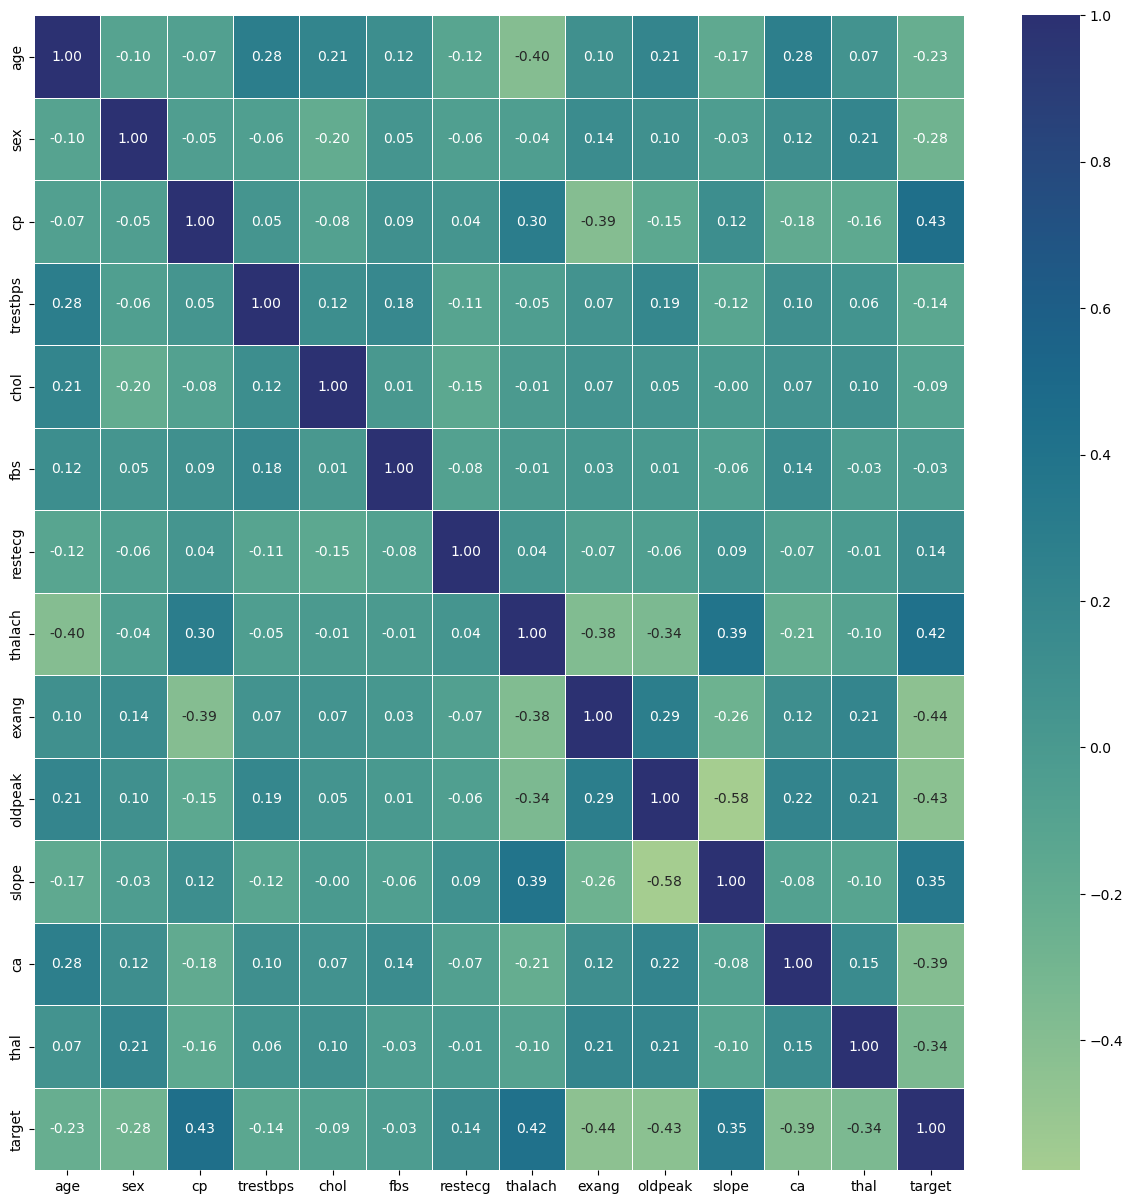

In [15]:
# Plotting Correction Matrix using Seaborn

fig , ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(heart.corr() , annot=True , linewidth=0.5 , fmt="0.2f" , cmap="crest");


### Getting Our Data Ready

In [16]:
# Splitting Data into X and y

X=heart.drop("target",axis=1)
y=heart["target"]

### Modeling

In [17]:
# Spling Data into Train and Test Data

np.random.seed(30)
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2)

#### 1 . Logistic Regression - Baseline Parameters

In [18]:
# Training and Testing Data

np.random.seed(30)
model=LogisticRegression()
model.fit(X_train , y_train)
log_sco=model.score(X_test , y_test)
log_sco

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8524590163934426

#### 2 . Linear SCV - Baseline Parameters

In [19]:
# Training and Testing Data

np.random.seed(30)
model=LinearSVC()
model.fit(X_train , y_train)
lin_sco=model.score(X_test , y_test)
lin_sco

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.8032786885245902

#### 3 . KNeighbours Classifier - Baseline Parameters

In [20]:
# Training and Testing Data

np.random.seed(30)
model=KNeighborsClassifier()
model.fit(X_train , y_train)
kn_sco=model.score(X_test , y_test)
kn_sco

0.6065573770491803

#### 4 . Random Forest Classifier - Baseline Parameters

In [21]:
# Training and Testing Data

np.random.seed(30)
model=RandomForestClassifier()
model.fit(X_train , y_train)
rfc_sco=model.score(X_test , y_test)
rfc_sco

0.7868852459016393

#### 5 . Bagging Classifier - Baseline Parameters

In [22]:
# Training and Testing Data

np.random.seed(30)
model=BaggingClassifier()
model.fit(X_train , y_train)
bag_sco=model.score(X_test , y_test)
bag_sco

0.7049180327868853

#### 6 . Perceptron - Baseline Parameters

In [23]:
# Training and Testing Data

np.random.seed(30)
model=Perceptron()
model.fit(X_train , y_train)
per_sco=model.score(X_test , y_test)
per_sco

0.5081967213114754

#### 7 .Linear Regression - Baseline Parameters

In [24]:
# Training and Testing Data

np.random.seed(30)
model=LinearRegression()
model.fit(X_train , y_train)
LinReg_sco=model.score(X_test , y_test)
LinReg_sco

0.4765800115245449

### Comparing All Model Accuracy

In [25]:
# Creating Dictionary

mod_sco={"Logistic Regression" : round(log_sco*100,2) , "Linear SVC" : round(lin_sco*100,2) , "KNeighhbours Classifier" : round(kn_sco*100,2) , "Random Forest Classifier" : round(rfc_sco*100,2) , "Bagging Classifier" : round(bag_sco*100,2) , "Perceptron" : round(per_sco*100,2) , "Linear Regression" : round(LinReg_sco*100,2)}
mod_sco

{'Logistic Regression': 85.25,
 'Linear SVC': 80.33,
 'KNeighhbours Classifier': 60.66,
 'Random Forest Classifier': 78.69,
 'Bagging Classifier': 70.49,
 'Perceptron': 50.82,
 'Linear Regression': 47.66}

In [26]:
# Creating DataFrame

mod_sco_df=pd.DataFrame(mod_sco , index=["Accuracy"])
mod_sco_df

,Logistic Regression,Linear SVC,KNeighhbours Classifier,Random Forest Classifier,Bagging Classifier,Perceptron,Linear Regression
Accuracy,85.25,80.33,60.66,78.69,70.49,50.82,47.66


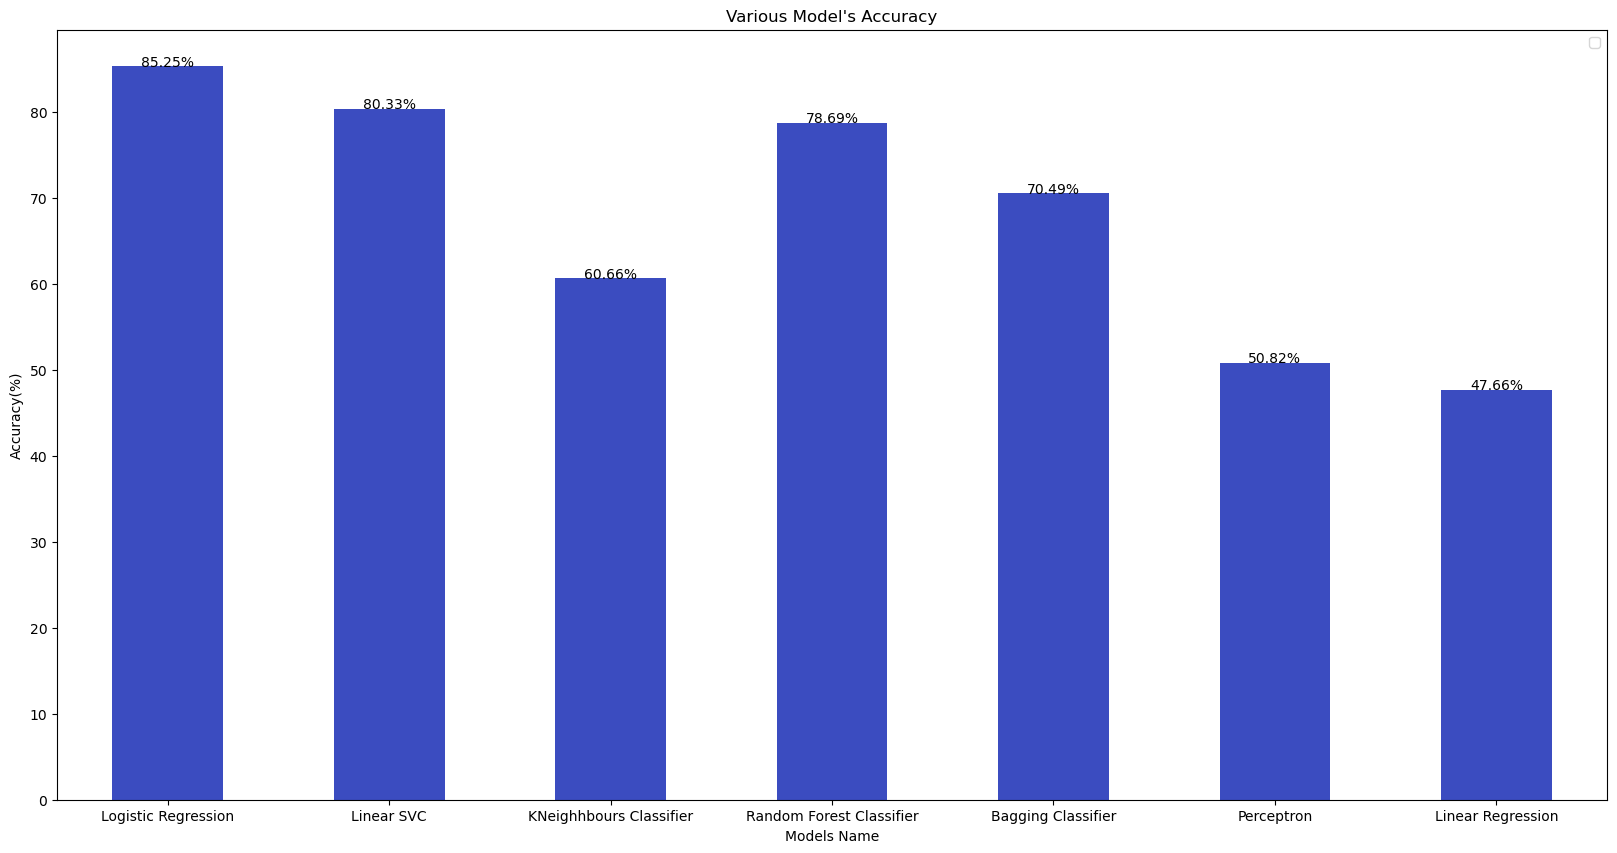

In [27]:
# Plotting All Model's Accuracy

mod_sco_df.T.plot(kind="bar",cmap="coolwarm",figsize=(20,10));
plt.xlabel("Models Name");
plt.ylabel("Accuracy(%)");
plt.title("Various Model's Accuracy")
plt.xticks(rotation=0);
plt.legend("");
i=0
for j in mod_sco.values():
    plt.text(i,j,f"{j}%",ha="center");
    i+=1

### Hyperparameter Tuning

#### 1 . Logistic Regression

In [28]:
# Different Values for Various Hyperparameters

LogTune={"C" : np.logspace(10^4,10^-4) , 
         "penalty" : ["l1" , "l2" , "elasticnet" , None] , 
         "solver" : ["liblinear" , "lbfgs" , "newton-cg"] , 
         "multi_class" : ["ovr"] , 
         "class_weight" : ["balanced"] , 
         "max_iter" : [100]
        }

LogMod=GridSearchCV(LogisticRegression() , param_grid=LogTune , cv=5 , verbose=3)
LogMod.fit(X_train , y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=100000000000000.0, class_we

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 5/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticn

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=100000000000000.0, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total ti

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-c

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 2/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=32374575428176.4, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penal

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 3/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solve

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 2/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=10481131341546.873, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfg

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=3393221771895.3296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ov

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, sol

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, s

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 1/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1098541141987.5573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=355648030622.31213, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalt

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 5/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticn

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 2/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=115139539932.6448, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, pena

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 2/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

[CV 4/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=37275937203.14938, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, sc

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 3/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solve

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 5/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 1/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=12067926406.393265, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 4/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=3906939937.0546207, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalt

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solv

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 5/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticn

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 4/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1264855216.855296, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 2/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, s

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalt

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 4/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=409491506.2380419, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, pen

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, s

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 2/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 2/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=132571136.55901109, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, sco

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 2/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.854 total time=   0.0s
[CV 4/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=42919342.60128778, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, pen

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 4/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=13894954.943731388, class_weight=balanced, max_iter=100, multi_class=ovr, penalty

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 4/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, s

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 5/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=4498432.668969444, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, pen

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1456348.4775012443, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, scor

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 3/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solve

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=471486.63634573895, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ov

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 3/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.729 total time=   0.0s
[CV 1/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solve

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 2/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 2/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=152641.79671752366, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, sco

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 2/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.854 total time=   0.0s
[CV 5/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=49417.13361323838, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=15998.587196060573, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ov

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 4/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=5179.4746792312235, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.750 total time=   0.0s
[CV 1/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lb

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 5/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, sol

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1676.83293681101, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, s

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-c

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=542.867543932386, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penal

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, s

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=175.75106248547965, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 3/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solve

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 2/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=56.898660290183045, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, s

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=18.420699693267164, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 2/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.816 total time=   0.0s
[CV 3/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, pen

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 4/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=n

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 2/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=5.963623316594637, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 2/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.833 total time=   0.0s
[CV 4/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, pe

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 5/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 2/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 3/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=e

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 4/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=1.9306977288832536, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, p

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lb

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 2/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.6250551925273976, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=o

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.837 total time=   0.0s
[CV 2/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 2/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_cla

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.20235896477251555, class_weight=balanced, max_iter=100, multi_class=ovr, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.673 total time=   0.0s
[CV 2/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.755 total time=   0.0s
[CV 3/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.875 total time=   0.0s
[CV 4/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.771 total time=   0.0s
[CV 5/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.688 total time=   0.0s
[CV 1/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, pena

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 3/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 4/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.06551285568595522, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.633 total time=   0.0s
[CV 2/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 4/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.771 total time=   0.0s
[CV 5/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.735 total time=   0.0s
[CV 2/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.755 total time=   0.0s
[CV 3/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.854 total time=   0.0s
[CV 4/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.708 total time=   0.0s
[CV 1/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.796 total time=   0.0s
[CV 2/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sh

[CV 5/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.021209508879201925, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, mult

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 1/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.714 total time=   0.0s
[CV 2/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=elasticnet, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, mu

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_clas

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV 5/5] END C=0.006866488450043027, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.673 total time=   0.0s
[CV 2/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.694 total time=   0.0s
[CV 3/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.646 total time=   0.0s
[CV 4/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.646 total time=   0.0s
[CV 5/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.542 total time=   0.0s
[CV 1/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

[CV 2/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.714 total time=   0.0s
[CV 2/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 2/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.002222996482526191, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=10

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.0007196856730011528, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.458 total time=   0.0s
[CV 4/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.479 total time=   0.0s
[CV 5/5] END C=0.00023299518105153813, class_weight=balanced, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.00023299518105153813, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.458 total time=   0.0s
[CV 4/5] END C=7.543120063354608e-05, class_weight=balanced, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, mul

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=7.543120063354608e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.4420530945486548e-05, class_weight=balanced, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.688 total time=   0.0s
[CV 4/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.729 total time=   0.0s
[CV 5/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.562 total time=   0.0s
[CV 1/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 2/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.714 total time=   0.0s
[CV 3/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.688 total time=   0.0s
[CV 4/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 5/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=2.4420530945486548e-05, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=7.906043210907734e-06, class_weight=balanced, m

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=7.906043210907734e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=7.906043210907734e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=7.906043210907734e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=7.906043210907734e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=7.906043210907734e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=7.906043210907734e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=7.906043210907734e-06, class_weight=balanced, max_iter=100, mul

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 1/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.458 total time=   0.0s
[CV 4/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.479 total time=   0.0s
[CV 5/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.479 total time=   0.0s
[CV 1/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 2/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=2.5595479226995334e-06, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.458 total time=   0.0s
[CV 4/5] END C=8.286427728546859e-07, class_weight=balanced, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 5/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=8.286427728546859e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.682695795279738e-07, class_weight=balanced, max_ite

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 3/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.646 total time=   0.0s
[CV 4/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.729 total time=   0.0s
[CV 5/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.500 total time=   0.0s
[CV 1/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.694 total time=   0.0s
[CV 2/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.714 total time=   0.0s
[CV 3/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.562 total time=   0.0s
[CV 4/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=o

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 2/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=2.682695795279738e-07, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=1

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.479 total time=   0.0s
[CV 1/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=ne

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 2/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=8.68511373751352e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=2.8117686979742367e-08, class_weight=balanced, max_iter=1

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.479 total time=   0.0s
[CV 1/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, so

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 3/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 3/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=9.102981779915264e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.458 total time=   0.0s
[CV 4/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 2/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.551 total time=   0.0s
[CV 2/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.531 total time=   0.0s
[CV 3/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=2.94705170255181e-09, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 2/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.469 total time=   0.0s
[CV 3/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.458 total time=   0.0s
[CV 4/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l1, solver=liblinear;, score=0.479 total time=   0.0s
[CV 5/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 4/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=9.540954763499962e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=3.0888435964774974e-10, class_weight=balanced, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 5/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=liblinear;, score=0.479 total time=   0.0s
[CV 1/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.531 total time=   0.0s
[CV 2/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.531 total time=   0.0s
[CV 3/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.542 total time=   0.0s
[CV 4/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.479 total time=   0.0s
[CV 1/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ov

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 2/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 3/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 4/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 5/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=liblinear;, score=nan total time=   0.0s
[CV 1/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=1

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 5/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s
[CV 1/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s
[CV 5/5] END C=3.0888435964774974e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s
[CV 1/5] END C=1e-10, class_weight=balanced, max_iter=100, mul

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


[CV 4/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.667 total time=   0.0s
[CV 5/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=lbfgs;, score=0.479 total time=   0.0s
[CV 1/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.551 total time=   0.0s
[CV 2/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.714 total time=   0.0s
[CV 3/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.604 total time=   0.0s
[CV 4/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.729 total time=   0.0s
[CV 5/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=l2, solver=newton-cg;, score=0.500 total time=   0.0s
[CV 1/5] END C=1e-10, class_weight=balance

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sa

[CV 1/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 2/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.816 total time=   0.0s
[CV 3/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 4/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.833 total time=   0.0s
[CV 5/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=lbfgs;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_

[CV 1/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.857 total time=   0.0s
[CV 2/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.837 total time=   0.0s
[CV 3/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.833 total time=   0.0s
[CV 4/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.854 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1500 fits failed out of a total of 3000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sk

[CV 5/5] END C=1e-10, class_weight=balanced, max_iter=100, multi_class=ovr, penalty=None, solver=newton-cg;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e+14, 3.23745754e+13, 1.04811313e+13, 3.39322177e+12,
       1.09854114e+12, 3.55648031e+11, 1.15139540e+11, 3.72759372e+10,
       1.20679264e+10, 3.90693994e+09, 1.26485522e+09, 4.09491506e+08,
       1.32571137e+08, 4.29193426e+07, 1.38949549e+07, 4.49843267e+06,
       1.45634848e+06, 4.71486636e+05, 1.526417...
       2.32995181e-04, 7.54312006e-05, 2.44205309e-05, 7.90604321e-06,
       2.55954792e-06, 8.28642773e-07, 2.68269580e-07, 8.68511374e-08,
       2.81176870e-08, 9.10298178e-09, 2.94705170e-09, 9.54095476e-10,
       3.08884360e-10, 1.00000000e-10]),
                         'class_weight': ['balanced'], 'max_iter': [100],
                         'multi_class': ['ovr'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg']},
             verbose=3)

In [29]:
#Finding Best Parameter

LogMod.best_params_

{'C': 1.9306977288832536,
 'class_weight': 'balanced',
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'solver': 'lbfgs'}

In [32]:
# Training and Testing Data with Hyperparameter Tuning

np.random.seed(30)
model=LogisticRegression(C=1.9306977288832536 , class_weight="balanced" , multi_class="ovr" , max_iter=100, penalty="l2" , solver="lbfgs")
model.fit(X_train , y_train)
log_sco1=model.score(X_test , y_test)
log_sco1

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8360655737704918

##### Logistic Regression - Baseline Parameters are Good ( 85.25% )

#### 2 . Linear SVC

In [36]:
# Different Values for Various Hyperparameters

LinTune={"C" : np.logspace(-2,2,5) , 
         "penalty" : ["l1" , "l2"] , 
         "loss" : ["hinge" , "squared_hinge"] , 
         "tol" : [1e-4 , 1e-3 , 1e-2] ,
         "max_iter" : [1000,2000] ,
         "multi_class" : ["ovr" , "crammer_singer"]
        }

LinMod=RandomizedSearchCV(LinearSVC() , param_distributions=LinTune , cv=5 , verbose=3 , n_iter=2000)
LinMod.fit(X_train , y_train)

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 240 is smaller than n_iter=2000. Running 240 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the wa

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.755 total time=   0.0s
[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.755 total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.771 total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.917 total time=   0.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.917 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.729 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.854 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.01, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.729 total time=   0.6s
[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.854 total time=   0.0s
[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.708 total time=   0.0s
[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.755 total time=   0.0s
[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.875 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.735 total time=   0.0s
[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.796 total time=   0.0s
[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.896 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.708 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.917 total time=   0.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.854 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.854 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.854 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.917 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.854 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.01, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.750 total time=   0.9s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan to

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.625 total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.755 total time=   0.0s
[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.479 total time=   0.0s
[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.796 total time=   0.0s
[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.708 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.917 total time=   0.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.854 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.729 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.854 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   0.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.854 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.854 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.729 total time=   0.6s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, scor

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.714 total time=   0.0s
[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.812 total time=   0.0s
[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.729 total time=   0.0s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.755 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.708 total time=   0.0s
[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.917 total time=   0.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.854 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.917 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.854 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   0.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.917 total time=   0.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.729 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   0.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.917 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.854 total time=   0.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.01, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.729 total time=   0.6s
[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, loss=hinge, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.735 total time=   0.0s
[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.917 total time=   0.0s
[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   2.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   2.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.875 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.896 total time=   2.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.771 total time=   2.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.837 total time=   2.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.857 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.875 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.896 total time=   3.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   3.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.857 total time=   3.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   2.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.896 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.875 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.771 total time=   2.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.857 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   2.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.875 total time=   2.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.875 total time=   2.7s
[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.750 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.878 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.857 total time=   2.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.875 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.896 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.750 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   2.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   2.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.896 total time=   2.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.896 total time=   3.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.1, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.750 total time=   3.0s
[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.896 total time=   0.0s
[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.667 total time=   0.0s
[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.714 total time=   0.0s
[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.490 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.833 total time=   0.0s
[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.917 total time=   0.0s
[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.854 total time=   0.0s
[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.667 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.837 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.837 total time=   2.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.875 total time=   3.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.896 total time=   2.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.771 total time=   2.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.878 total time=   2.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.837 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.896 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.771 total time=   2.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.875 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.896 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.792 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.837 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.837 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.896 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.750 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.837 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   2.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.875 total time=   2.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.896 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.750 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.896 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.1, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.729 total time=   2.3s
[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.750 total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.816 total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.816 total time=   0.0s
[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.729 total time=   0.0s
[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.646 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.469 total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.833 total time=   0.0s
[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.792 total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.646 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.837 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.837 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.896 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.750 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.896 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.792 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.875 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.896 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.771 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.857 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.837 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.837 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.917 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.875 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.750 total time=   2.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   2.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   2.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.896 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.896 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.750 total time=   2.5s
[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan to

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.458 total time=   0.0s
[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.604 total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.750 total time=   0.0s
[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.551 total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.837 total time=   0.0s
[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.896 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.708 total time=   0.0s
[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.469 total time=   0.0s
[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.551 total time=   0.0s
[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.833 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.708 total time=   0.0s
[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.688 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.837 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.896 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.896 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.792 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.837 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.896 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.896 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.875 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.896 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.857 total time=   2.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   2.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.896 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.896 total time=   3.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.750 total time=   2.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.816 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.857 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.875 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.896 total time=   2.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.750 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.796 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.875 total time=   2.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.896 total time=   2.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=0.1, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.750 total time=   2.5s
[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_ite

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.776 total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.812 total time=   0.0s
[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.646 total time=   0.0s
[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.500 total time=   0.0s
[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.694 total time=   0.0s
[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.837 total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.917 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.875 total time=   0.0s
[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.714 total time=   0.0s
[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.816 total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.854 total time=   0.0s
[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.792 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.646 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.812 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.708 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.771 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.776 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.612 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.792 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.792 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.771 total time=   4.0s
[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.673 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.673 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.812 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.771 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.633 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.694 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.604 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.792 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.750 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.714 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.633 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.542 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.812 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.708 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.551 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.776 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.833 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.771 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=1.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.771 total time=   4.2s
[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, 

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.796 total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.896 total time=   0.0s
[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.771 total time=   0.0s
[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.688 total time=   0.0s
[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.857 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.796 total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.812 total time=   0.0s
[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.542 total time=   0.0s
[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.729 total time=   0.0s
[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.531 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.646 total time=   0.0s
[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.750 total time=   0.0s
[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.667 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.673 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.551 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.500 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.708 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.729 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.755 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.583 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.792 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.604 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.796 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.708 total time=   5.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.792 total time=   5.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.750 total time=   5.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.714 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.592 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.500 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.771 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.750 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.735 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.796 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.750 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.708 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.688 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.776 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.667 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.792 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=1.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.750 total time=   4.3s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.688 total time=   0.0s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.755 total time=   0.0s
[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.735 total time=   0.0s
[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.604 total time=   0.0s
[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.604 total time=   0.0s
[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.646 total time=   0.0s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.694 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.833 total time=   0.0s
[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.833 total time=   0.0s
[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.604 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.755 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.562 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.792 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.771 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.735 total time=   3.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.562 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.854 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.750 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.776 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.755 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.875 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.771 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.500 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.694 total time=   5.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.612 total time=   3.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.854 total time=   3.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.625 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.708 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.551 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.490 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.625 total time=   5.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.833 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.604 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.592 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.708 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.792 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.708 total time=   3.6s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan to

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.917 total time=   0.0s
[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.854 total time=   0.0s
[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.708 total time=   0.0s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.755 total time=   0.0s
[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.796 total time=   0.0s
[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.917 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.792 total time=   0.0s
[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.735 total time=   0.0s
[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.490 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.896 total time=   0.0s
[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.688 total time=   0.0s
[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.688 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.796 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.771 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.750 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.729 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.592 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.776 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.688 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.833 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.667 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.571 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.571 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.708 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.812 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.688 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.837 total time=   3.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.776 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.812 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.771 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.667 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.796 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.735 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.812 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.812 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.729 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.735 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.816 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.854 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.792 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=1.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.708 total time=   4.2s
[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge,

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.562 total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.729 total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.688 total time=   0.0s
[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.469 total time=   0.0s
[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.776 total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.812 total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.708 total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.667 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.612 total time=   0.0s
[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.896 total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.562 total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.604 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.776 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.776 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.542 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.750 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.708 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.531 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.776 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.458 total time=   5.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.812 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.750 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.673 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.755 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.875 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.792 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.479 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.551 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.857 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.917 total time=   5.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.812 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.646 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.857 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.796 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.750 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.875 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.562 total time=   3.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.571 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.592 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.583 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.812 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=10.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.583 total time=   4.3s
[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_it

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.857 total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.729 total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.750 total time=   0.0s
[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.735 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.816 total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.750 total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.562 total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.833 total time=   0.0s
[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.792 total time=   0.0s
[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.729 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.796 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.796 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.625 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.792 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.708 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.857 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.592 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.646 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.792 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.708 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.571 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.857 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.792 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.812 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.688 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.837 total time=   3.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.837 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.917 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.750 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.688 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.755 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.776 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.583 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.562 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.729 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.571 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.735 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.833 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.812 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=10.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.729 total time=   3.6s
[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan to

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.812 total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.812 total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.500 total time=   0.0s
[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.714 total time=   0.0s
[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.776 total time=   0.0s
[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.604 total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.792 total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, scor

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.771 total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.812 total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.667 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.755 total time=   3.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.776 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.875 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.812 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.792 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.857 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.796 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.458 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.653 total time=   3.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.500 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.708 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.750 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.592 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.796 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.583 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.708 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.551 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.776 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.625 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.854 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.708 total time=   5.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.633 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.735 total time=   3.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.458 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.583 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.479 total time=   4.2s
[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, scor

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.812 total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.875 total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.771 total time=   0.0s
[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.878 total time=   0.0s
[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.776 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.875 total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.857 total time=   0.0s
[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.837 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.625 total time=   0.0s
[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.542 total time=   0.0s
[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.500 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.755 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.694 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.938 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.812 total time=   3.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.667 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.776 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.796 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.875 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.625 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.562 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.776 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.673 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.854 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.812 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.708 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.837 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.792 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.833 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   3.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.571 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.653 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.833 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.833 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.521 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.694 total time=   3.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.812 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.792 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=10.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.729 total time=   4.3s
[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, lo

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.792 total time=   0.0s
[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.604 total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.667 total time=   0.0s
[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.714 total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.857 total time=   0.0s
[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.750 total time=   0.0s
[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.750 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.735 total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.837 total time=   0.0s
[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.583 total time=   0.0s
[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.792 total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.708 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.694 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.694 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.792 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.729 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.708 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.776 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.612 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.771 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.771 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.837 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.833 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.729 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.816 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.755 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.583 total time=   5.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.667 total time=   5.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.571 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.776 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.750 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.854 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.667 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.633 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.735 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.542 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.688 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=100.0, loss=hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.708 total time=   4.1s
[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, loss=hing

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.812 total time=   0.0s
[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.812 total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.792 total time=   0.0s
[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.837 total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.776 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.812 total time=   0.0s
[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.667 total time=   0.0s
[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.755 total time=   0.0s
[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.776 total time=   0.0s
[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.917 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The d

[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.708 total time=   0.0s
[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.646 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.837 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.816 total time=   3.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.458 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.812 total time=   3.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.750 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.857 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.653 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.458 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.583 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.729 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.673 total time=   3.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.776 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.771 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.792 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.771 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.531 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.694 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.583 total time=   3.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.750 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.735 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.755 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.792 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.854 total time=   5.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.812 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.531 total time=   3.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.776 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.896 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.583 total time=   3.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=100.0, loss=hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.771 total time=   3.8s
[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l1, tol=0.001;, scor

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.542 total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.708 total time=   0.0s
[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.837 total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.776 total time=   0.0s
[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.479 total time=   0.0s
[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.667 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.837 total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.673 total time=   0.0s
[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.458 total time=   0.0s
[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.583 total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.708 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.796 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.796 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.771 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.750 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.688 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.816 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.714 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.750 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.854 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.562 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.755 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.816 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.812 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.750 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.500 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.510 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.776 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.688 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.771 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.729 total time=   4.3s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.694 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.633 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.458 total time=   5.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.792 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.688 total time=   4.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.837 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.551 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.833 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.771 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib

[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=1000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.750 total time=   4.8s
[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.0001;, score=nan total time=   0.0s
[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.001;, score=nan total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l1, tol=0.00

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.646 total time=   0.0s
[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.708 total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.0001;, score=0.750 total time=   0.0s
[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.735 total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.571 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.771 total time=   0.0s
[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.583 total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.001;, score=0.625 total time=   0.0s
[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.837 total time=   0.0s
[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.735 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: L

[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.771 total time=   0.0s
[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.646 total time=   0.0s
[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=ovr, penalty=l2, tol=0.01;, score=0.500 total time=   0.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.837 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.612 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.896 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.583 total time=   3.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.0001;, score=0.646 total time=   3.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.694 total time=   4.4s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.776 total time=   3.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.708 total time=   4.8s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.854 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.001;, score=0.708 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.633 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.796 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.500 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.792 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l1, tol=0.01;, score=0.521 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.653 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.776 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.562 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.812 total time=   4.5s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.0001;, score=0.708 total time=   4.0s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.571 total time=   4.2s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.633 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.625 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.792 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.001;, score=0.729 total time=   4.1s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 1/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.714 total time=   3.9s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 2/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.755 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 3/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.604 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[CV 4/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.812 total time=   4.7s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
300 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn

[CV 5/5] END C=100.0, loss=squared_hinge, max_iter=2000, multi_class=crammer_singer, penalty=l2, tol=0.01;, score=0.583 total time=   4.6s


C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=2000,
                   param_distributions={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                                        'loss': ['hinge', 'squared_hinge'],
                                        'max_iter': [1000, 2000],
                                        'multi_class': ['ovr',
                                                        'crammer_singer'],
                                        'penalty': ['l1', 'l2'],
                                        'tol': [0.0001, 0.001, 0.01]},
                   verbose=3)

In [37]:
#Finding Best Parameter

LinMod.best_params_

{'tol': 0.001,
 'penalty': 'l1',
 'multi_class': 'crammer_singer',
 'max_iter': 2000,
 'loss': 'hinge',
 'C': 0.1}

In [38]:
# Training and Testing Data with Hyperparameter Tuning

np.random.seed(30)
model=LinearSVC(C=0.1  , loss="hinge" , max_iter=2000 , multi_class="crammer_singer" , penalty="l1" , tol=0.001)
model.fit(X_train , y_train)
lin_sco1=model.score(X_test , y_test)
lin_sco1

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.819672131147541

##### Linear SVC - Tuned Hyperparameters are Good ( 81.96% )

* C = 0.1
* loss = hinge
*  max_iter =2000
*  multi_class = crammer_singer
*  penalty = l1
*  tot = 0.001

#### 3 . Random Forest Classifier

In [39]:
# Different Values for Various Hyperparameters

RanTune={'n_estimators': [100, 200, 500],
         'max_depth': [10, 20, None],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 4],
         'max_features': ['auto', 'sqrt', 'log2'],
         'bootstrap': [True, False]
        }

RanMod=GridSearchCV(RandomForestClassifier() , param_grid=RanTune , cv=5 , verbose=3)
RanMod.fit(X_train , y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, m

[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=4, min_samp

[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.854 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.854 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.792 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.837 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.776 total time=   1.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.854 total time=   1.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_le

[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.755 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.896 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.896 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.750 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.755 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, 

[CV 1/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.816 total time=   1.9s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.776 total time=   1.8s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.833 total time=   1.8s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.896 total time=   1.9s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.812 total time=   1.9s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.816 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=1, 

[CV 5/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.755 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.833 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.938 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.792 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=2, 

[CV 4/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.896 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.792 total time=   1.7s
[CV 1/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.796 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.735 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.833 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.833 total time=   0.2s
[CV 5/5] END bootstrap=True, max_depth=10, max_features=log2, min_samples_leaf

[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_

[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=4, min_sampl

[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.776 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.833 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.896 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.792 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.857 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.755 total time=   1.8s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_le

[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.816 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.776 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.875 total time=   0.2s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.854 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.771 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=4, 

[CV 5/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.812 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.837 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.796 total time=   1.7s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.833 total time=   1.8s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.917 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.812 total time=   1.8s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=1, 

[CV 4/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.854 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.755 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.833 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.896 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=2, 

[CV 3/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.833 total time=   1.7s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.896 total time=   1.6s
[CV 5/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.792 total time=   1.7s
[CV 1/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.735 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.812 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=20, max_features=log2, min_samples_leaf=

[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=2

[CV 2/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.776 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.755 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_sample

[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.3s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.7s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.735 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.833 total time=   0.7s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.938 total time=   0.8s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.792 total time=   0.8s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_sa

[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.812 total time=   1.6s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.875 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.792 total time=   1.6s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.857 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.735 total time=   0.2s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.833 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=sqrt, min_sa

[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.857 total time=   0.6s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.776 total time=   0.7s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.833 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.875 total time=   0.7s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.792 total time=   0.7s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.837 total time=   1.8s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=log2, min_sa

[CV 4/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.896 total time=   1.8s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.792 total time=   1.7s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.837 total time=   0.3s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.735 total time=   0.3s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.854 total time=   0.3s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.917 total time=   0.3s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=log2, mi

[CV 2/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.755 total time=   0.6s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.812 total time=   0.6s
[CV 4/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.917 total time=   0.6s
[CV 5/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.812 total time=   0.6s
[CV 1/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.837 total time=   1.7s
[CV 2/5] END bootstrap=True, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.755 total time=   1.7s
[CV 3/5] END bootstrap=True, max_depth=None, max_features=log2, 

[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_s

[CV 2/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.857 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.776 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=

[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.796 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.776 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.833 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.896 total time=   0.6s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.812 total time=   0.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=500;, score=0.837 total time=   1.4s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.812 total time=   1.6s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.816 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.776 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.812 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.896 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.792 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=sqrt, min_samples_l

[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.896 total time=   0.7s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.792 total time=   0.7s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.796 total time=   1.6s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.776 total time=   1.4s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.833 total time=   1.4s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=500;, score=0.896 total time=   1.5s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_l

[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.833 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.938 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.792 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.857 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.816 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=200;, score=0.812 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_sam

[CV 2/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.714 total time=   1.3s
[CV 3/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.833 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.896 total time=   1.4s
[CV 5/5] END bootstrap=False, max_depth=10, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=0.812 total time=   1.3s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_l

[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_s

[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=4, 

[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.854 total time=   0.5s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=200;, score=0.812 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.816 total time=   1.4s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.776 total time=   1.5s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.833 total time=   1.3s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=500;, score=0.958 total time=   1.4s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_sam

[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.2s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.896 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.3s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.714 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=200;, score=0.812 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_l

[CV 2/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.755 total time=   1.8s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.833 total time=   1.7s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.875 total time=   1.7s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=2, n_estimators=500;, score=0.812 total time=   1.8s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.796 total time=   0.3s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.776 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_l

[CV 1/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.837 total time=   0.6s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.796 total time=   0.6s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.833 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.917 total time=   0.6s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=0.812 total time=   0.6s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.816 total time=   1.6s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_l

[CV 5/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=500;, score=0.792 total time=   1.4s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.796 total time=   0.4s
[CV 2/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.755 total time=   0.3s
[CV 3/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.833 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.875 total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=20, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.771 total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=20, max_features=log2, min_samp

[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples

[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=500;, score=nan total time=   0.0s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_s

[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.812 total time=   0.3s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.896 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=100;, score=0.792 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.837 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.796 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=200;, score=0.833 total time=   0.6s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt,

[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.796 total time=   1.4s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.735 total time=   2.1s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.812 total time=   1.9s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.896 total time=   1.4s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=500;, score=0.812 total time=   1.5s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=100;, score=0.816 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=sqrt,

[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.938 total time=   0.2s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=100;, score=0.833 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.796 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.776 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.833 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=1, min_samples_split=5, n_estimators=200;, score=0.854 total time=   0.6s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=log2,

[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.796 total time=   1.5s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.833 total time=   1.5s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.917 total time=   1.5s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=500;, score=0.812 total time=   1.5s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.796 total time=   0.2s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=2, min_samples_split=10, n_estimators=100;, score=0.755 total time=   0.2s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=log

[CV 5/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=100;, score=0.812 total time=   0.2s
[CV 1/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.816 total time=   0.5s
[CV 2/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.755 total time=   0.5s
[CV 3/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.833 total time=   0.5s
[CV 4/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.896 total time=   0.6s
[CV 5/5] END bootstrap=False, max_depth=None, max_features=log2, min_samples_leaf=4, min_samples_split=10, n_estimators=200;, score=0.812 total time=   0.5s
[CV 1/5] END bootstrap=False, max_depth=None, max_features

C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
810 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\adars\Desktop\sample_project_1\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    val

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=3)

In [41]:
#Finding Best Parameter

RanMod.best_params_

{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [42]:
# Training and Testing Data with Hyperparameter Tuning

np.random.seed(30)
model=RandomForestClassifier(n_estimators=100 , min_samples_split=5 , min_samples_leaf=1 , max_features="log2" , max_depth=20 , bootstrap=True)
model.fit(X_train , y_train)
rfc_sco1=model.score(X_test , y_test)
rfc_sco1

0.8524590163934426

##### Random Forest Classifier - Tuned Hyperparameters are Good ( 85.24% )
* n_estimators = 100
* min_samples_split = 5
* min_samples_leaf = 1
* max_features = "log2"
* max_depth = 20
* bootstrap = True